感知机
二分类模型

$f(x) = sign(w*x + b)$

损失函数 $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

算法
随即梯度下降法 Stochastic Gradient Descent

随机抽取一个误分类点使其梯度下降。

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

当实例点被误分类，即位于分离超平面的错误侧，则调整w, b的值，使分离超平面向该无分类点的一侧移动，直至误分类点被正确分类

拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征

In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [35]:

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [36]:
# 查看 类别和类别的数量
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

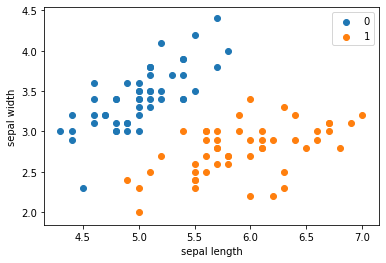

In [50]:

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


In [51]:
# 获取前100行的第 0 1 和最后一列数据
data = np.array(df.iloc[:100, [0, 1, -1]])

In [52]:
X, y = data[:,:-1], data[:,-1]

In [53]:
# 将标签转化为 1 和 -1

y = np.array([1 if i == 1 else -1 for i in y])

# Perceptron

In [54]:

# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        # self.data = data
    
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate*np.dot(y, X)
                    self.b = self.b + self.l_rate*y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
        
    def score(self):
        pass

In [55]:

perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

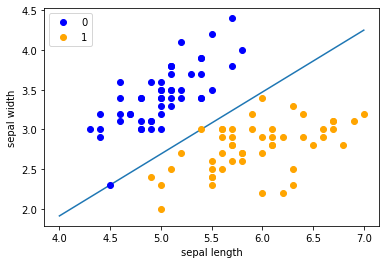

In [56]:

x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# scikit-learn Perceptron

In [142]:
def makeLinearSeparableData(weights, numLines):
    '''
    numFeatures 是一个正整数，代表特征的数量
    :param weights:是一个列表，里面存储的是我们用来产生随机数据的那条直线的法向量。
    :param numLines:是一个正整数，表示需要创建多少个数据点。
    :return:最后返回数据集合。
    '''
    w = np.array(weights)
    numFeatures = len(weights)
    dataSet = np.zeros((numLines, numFeatures + 1))

    for i in range(numLines):
        x = np.random.rand(1, numFeatures) * 20 - 10
        # 计算内积
        innerProduct = np.sum(w * x)
        if innerProduct <= 0:
            # numpy 提供的 append 函数可以扩充一维数组，
            dataSet[i] = np.append(x, -1)
        else:
            dataSet[i] = np.append(x, 1)
    return dataSet


data = makeLinearSeparableData([4,3, 2], 100)

## 感知机（percetpron）

In [124]:
from sklearn.linear_model import Perceptron

In [144]:
#定义感知机
clf = Perceptron(fit_intercept=False,shuffle=False)

In [145]:
#使用训练数据进行训练
clf.fit(data[:,[0,1,2]],data[:,3])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
#得到训练结果，权重矩阵
print(clf.coef_)
#输出为：[[-0.38478876,4.41537463]]

[[43.97100696 28.71036515 22.40772806]]


In [147]:
#超平面的截距，此处输出为：[0.]
print(clf.intercept_)

[0.]


In [148]:
#利用测试数据进行验证
acc = clf.score(x_data_test,y_data_test)

ValueError: X has 2 features per sample; expecting 3

In [149]:
print(acc)
#得到的输出结果为0.995，这个结果还不错吧。

0.08


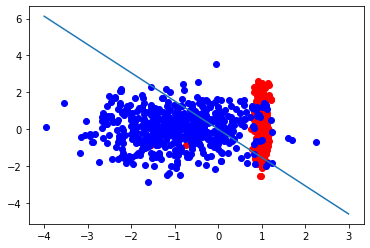

In [150]:
from matplotlib import pyplot as plt
#画出正例和反例的散点图
plt.scatter(positive_x1,positive_x2,c='red')
plt.scatter(negetive_x1,negetive_x2,c='blue')
#画出超平面（在本例中即是一条直线）
line_x = np.arange(-4,4)
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y)
plt.show()